<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de 8 puntos, Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 13 de marzo a las 10:00 am. Evite el uso de inteligencia artificial y realice un análisis cuidadoso de los errores.



(80 %) En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



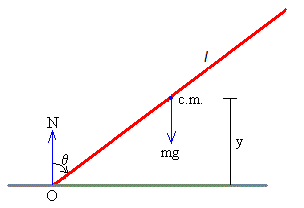


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?




### Matrices: Rotación  en el plano, autovalores y autovectores
8 (20%).   Considere la siguiente matrix de rotación:
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

Encontrar los autovalores y autovectores para $\theta=45$.
**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [301]:
import sympy as sp
import numpy as np
from sympy.abc import theta
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [302]:
g = 9.8
l = 0.1

theta_2_dot_fn = lambda theta, theta_dot: (
        (((2 * g) / l) - (theta_dot**2) * np.cos(theta))
        / ((1 / 3) + np.sin(theta) ** 2)
    ) * np.sin(theta)

#Esto es un machete, pero no me quiero complicar en el parcial :b
theta_dot_2_sol = []

def f(state, t):
    theta, theta_dot = state

    theta_2_dot = theta_2_dot_fn(theta, theta_dot)


    return [theta_dot, theta_2_dot]


t_max = 0.2
num_points = 200
t = np.linspace(0, t_max, num_points)

state_0 = [np.pi/12, 0]

solution = odeint(f, state_0, t)

theta_sol = solution[:,0]
theta_dot_sol = solution[:,1]

#Esto es un machete, pero no me quiero complicar mucho
theta_dot_2_sol = []

for state in   np.c_[theta_sol, theta_dot_sol]:
    theta_dot_2_sol.append(theta_2_dot_fn(state[0], state[1]))

theta_max = np.pi/2

print(f"valor theta_max: {theta_max}")


valor theta_max: 1.5707963267948966


/mnt/ubuntu/home/anotherdev/workspace/udea/metodos_computacionales/env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


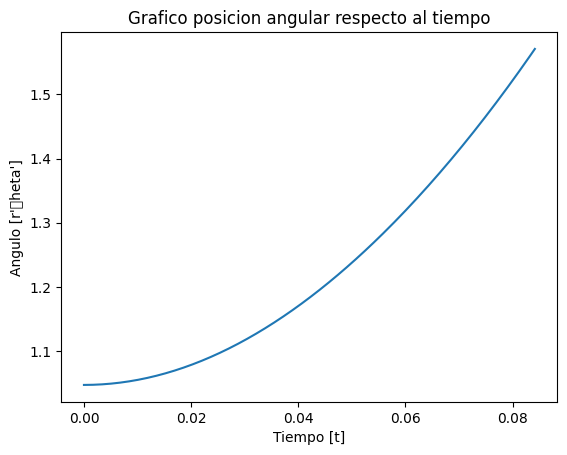

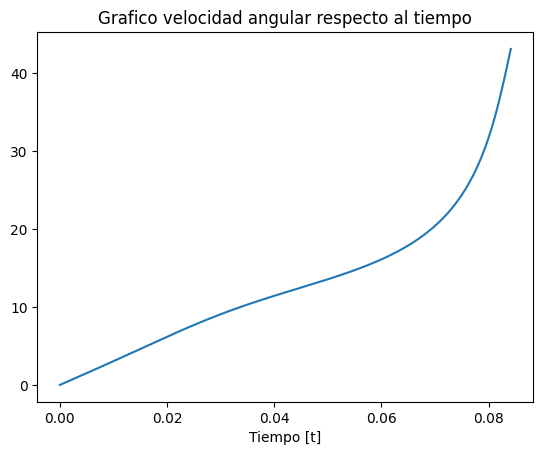

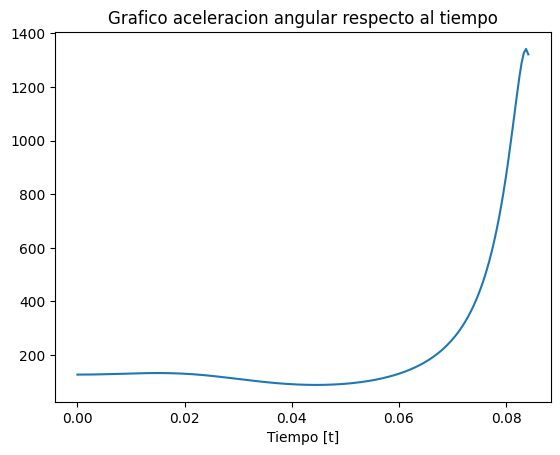

In [324]:

plt.plot(t,theta_sol)
plt.title("Grafico posicion angular respecto al tiempo")
plt.xlabel("Tiempo [t]")
plt.ylabel("Angulo [r'\theta']")
plt.show()

plt.plot(t,theta_dot_sol)
plt.title("Grafico velocidad angular respecto al tiempo")
plt.xlabel("Tiempo [t]")
plt.show()

plt.plot(t,theta_dot_2_sol)
plt.title("Grafico aceleracion angular respecto al tiempo")
plt.xlabel("Tiempo [t]")
plt.show(
)


Note que la solución no considera la existencia del suelo por tanto se debe considerar el tiempo hasta que el angulo $\theta$ alcanze por primera vez $\frac{\pi}{2}$

A continuación hay un metodo bastante arcaico para encontrar el tiempo en el que eso ocurre para la configuracion actual de odeint 

In [304]:
from scipy import interpolate
from scipy import optimize

def optimize_params(t, theta_sol):
   cs =  interpolate.CubicSpline(t, theta_sol)
   translated_fn = lambda t : cs(t) - np.pi/2
   root = optimize.bisect(translated_fn, min(t), max(t))

   # plt.plot(t, cs(t))
   # plt.plot(root, cs(root), '+')
   # plt.title("Optimization")
   print(f"root: {root}, value: {cs(root)}")
   return root

In [305]:
angles = [np.pi/12, np.pi/6,np.pi/4,np.pi/3]
w0 = 0

t_max_unoptimized = 0.5
num_points = 200
t_unoptimized = np.linspace(0, t_max_unoptimized, num_points)

for angle in angles:
    solution_unoptimized = odeint(f, [angle, w0], t_unoptimized)
    theta_sol_unoptimized = solution_unoptimized[:,0]
    optimize_params(t_unoptimized, theta_sol_unoptimized)
    time_optimized = optimize_params(t_unoptimized, theta_sol)


root: 0.1479832363602327, value: 1.5707963268099034
root: 0.3699580906486517, value: 1.570796326784612
root: 0.12177877490648825, value: 1.5707963267958447
root: 0.3699580906486517, value: 1.570796326784612
root: 0.10332124473097792, value: 1.5707963267981486
root: 0.3699580906486517, value: 1.570796326784612
root: 0.08416005096842127, value: 1.5707963267861988
root: 0.3699580906486517, value: 1.570796326784612


4
root: 0.1479832363602327, value: 1.5707963268099034
Tiempo de caida para angulo: 0.2617993877991494 es de 0.1479832363602327s
root: 0.12177877490648825, value: 1.5707963267958447
Tiempo de caida para angulo: 0.5235987755982988 es de 0.12177877490648825s
root: 0.10332124473097792, value: 1.5707963267981486
Tiempo de caida para angulo: 0.7853981633974483 es de 0.10332124473097792s
root: 0.08416005096842127, value: 1.5707963267861988
Tiempo de caida para angulo: 1.0471975511965976 es de 0.08416005096842127s


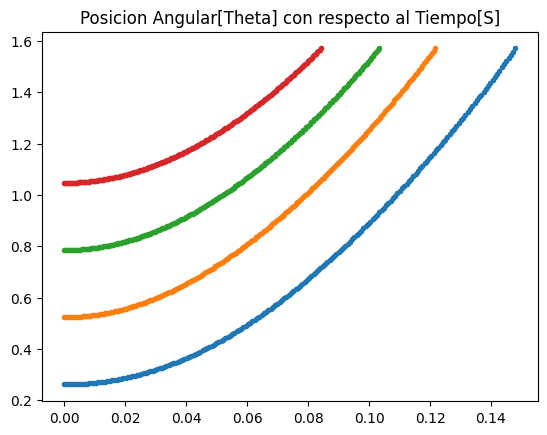

In [315]:
angles = [np.pi/12, np.pi/6,np.pi/4,np.pi/3]
w0 = 0

t_max_unoptimized = 0.5
num_points = 200
t_unoptimized = np.linspace(0, t_max_unoptimized, num_points)
print(len(angles))

for angle in angles:
    solution_unoptimized = odeint(f, [angle, w0], t_unoptimized)
    theta_sol_unoptimized = solution_unoptimized[:,0]
    time_optimized = optimize_params(t_unoptimized, theta_sol_unoptimized)
    t_max = time_optimized
    t = np.linspace(0,t_max, num_points)
    solution = odeint(f, [angle, w0], t)
    theta_sol = solution[:,0]
    plt.plot(t, theta_sol, '.')
    print(f"Tiempo de caida para angulo: {angle} es de {t_max}s")

plt.title('Posicion Angular[Theta] con respecto al Tiempo[S]')    
plt.show()


In [318]:
from scipy.integrate import quad


for angle in angles:

    theta_0 = angle
    integrando = lambda theta: np.sqrt(((1/3)+ np.sin(theta)**2)/(np.cos(theta_0)- np.cos(theta)))

    Int = quad(integrando,theta_0, np.pi/2)
    T = (1/2)*np.sqrt(l/g)  * Int[0]
    print(f"El tiempo de caida analitico es aproximadamente: {T}s")


El tiempo de caida analitico es aproximadamente: 0.1479832354352146s
El tiempo de caida analitico es aproximadamente: 0.12177877486181128s
El tiempo de caida analitico es aproximadamente: 0.10332124464084698s
El tiempo de caida analitico es aproximadamente: 0.08416005040768007s


Note que los tiempos de caida analiticos y numericos son muy similares, el error es del orden de $10^{-4}$

/tmp/ipykernel_183747/3082371243.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  integrando = lambda theta: np.sqrt(((1/3)+ np.sin(theta)**2)/(np.cos(theta_0)- np.cos(theta)))
/tmp/ipykernel_183747/3082371243.py:10: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  Int = quad(integrando,theta_0, np.pi/2)


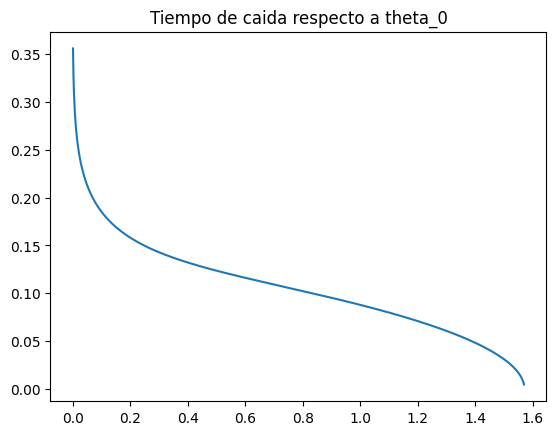

In [322]:
cont_angles = np.linspace(0, np.pi/2, 1000)

times = []

for angle in cont_angles:

    theta_0 = angle
    integrando = lambda theta: np.sqrt(((1/3)+ np.sin(theta)**2)/(np.cos(theta_0)- np.cos(theta)))

    Int = quad(integrando,theta_0, np.pi/2)
    T = (1/2)*np.sqrt(l/g)  * Int[0]
    times.append(T)



plt.plot(cont_angles, times)
plt.title("Tiempo de caida respecto a theta_0")
plt.show()

In [307]:
A = sp.Matrix([[sp.cos(theta),-1*sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])
display(A)


Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [308]:
I = sp.eye(2)
ld =  sp.Symbol('λ')
M = A - ld*I
display(M)
carac_pol = M.det()
print("Polinomio caracteristico")
display(carac_pol)

Matrix([
[-λ + cos(theta),     -sin(theta)],
[     sin(theta), -λ + cos(theta)]])

Polinomio caracteristico


λ**2 - 2*λ*cos(theta) + sin(theta)**2 + cos(theta)**2

In [309]:
eigenVals = A.eigenvals()
eigenVecs = A.eigenvects()

C, D = A.diagonalize()

display(D)

Matrix([
[-sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta),                                                    0],
[                                                    0, sqrt((cos(theta) - 1)*(cos(theta) + 1)) + cos(theta)]])